

# Probabilistic Principal Component Analysis (PPCA) on Digits Dataset

This code implements PPCA by two methods:
1. ML solution using spectral decomposition.
2. EM algorithm for PPCA.

Note: The data is loaded from the UCI "Optical Recognition of Handwritten Digits"
      dataset (file: opdigits.tes). This dataset contains 1797 samples, each with
      64 features (the last column is the digit label), which is equivalent to
      sklearn.datasets.load_digits.




## Data Loading
Load the digits dataset.

In [20]:

# -----------------------------
# 1. Data Loading
# -----------------------------
# Download and load the digits dataset from UCI.

digits_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes"
if (!file.exists("optdigits.tes")) {
  download.file(digits_url, destfile = "optdigits.tes")
}


In [21]:

# Read the data (comma-separated): first 64 columns are features, the 65th column is label.
digits_data <- read.table("optdigits.tes", sep = ",", header = FALSE)
X <- as.matrix(digits_data[, 1:64])
y <- digits_data[, 65]

cat("X shape:", dim(X), "\n")           # Should be (1797, 64)
cat("Unique labels:", sort(unique(y)), "\n")  # Expected: 0-9


X shape: 1797 64 
Unique labels: 0 1 2 3 4 5 6 7 8 9 


In [22]:


Xtrain <- X
ytrain <- y


pdf 
  2

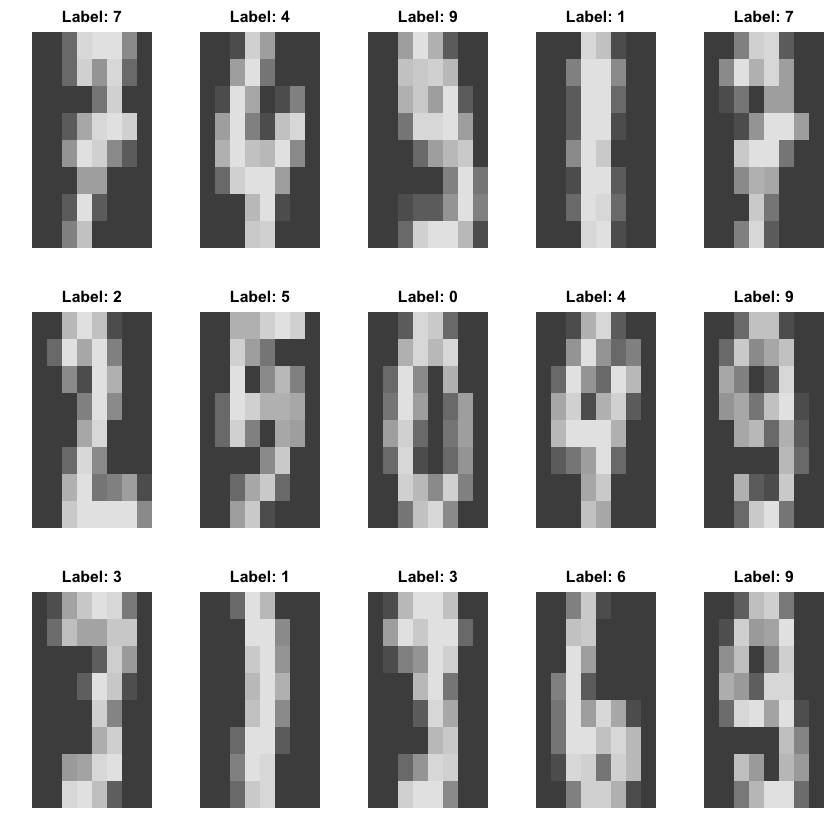

In [23]:
# Function to visualize random digit samples
visualize_digits <- function(X, y, n_samples=15, random_state=42) {
  set.seed(random_state)
  indices <- sample(1:nrow(X), n_samples, replace = FALSE)
  n_cols <- 5
  n_rows <- ceiling(n_samples / n_cols)
  par(mfrow=c(n_rows, n_cols), mar=c(2, 2, 2, 1))
  
  for (i in 1:n_samples) {
    # 创建8x8矩阵并转置，使数字显示正确方向
    digit_image <- t(matrix(X[indices[i], ], nrow=8, ncol=8, byrow=TRUE))
    # 翻转图像以确保正确的方向
    image(digit_image[, ncol(digit_image):1], 
          col=gray.colors(256), 
          axes=FALSE)
    title(main=paste("Label:", y[indices[i]]))
  }
}

visualize_digits(X, y, n_samples=15)
# save the plot to a pdf
pdf("digits_visualization.pdf")
visualize_digits(X, y, n_samples=15)
dev.off()


## ML PPCA
Compute ML estimates using spectral decomposition and project the data to a lower-dimensional space.




## EM Algorithm Implementation for PPCA




## Task4

The following code show example how to using standard PCA extract the latent embeddings and project the latent embeddings using t-SNE.

In [ ]:
# Check if the Rtsne package is installed
if (!requireNamespace("Rtsne", quietly = TRUE)) {
  # Install the Rtsne package if it's not already installed
  install.packages("Rtsne")
}

 [1] "Variance explained by PCA components:  28.5093648236993"
 [2] "Variance explained by PCA components:  54.4963526726898"
 [3] "Variance explained by PCA components:  63.7292500006396"
 [4] "Variance explained by PCA components:  73.8226768845953"
 [5] "Variance explained by PCA components:  80.2895776104032"
 [6] "Variance explained by PCA components:  83.5305336403744"
 [7] "Variance explained by PCA components:  86.2588384427105"
 [8] "Variance explained by PCA components:  89.4303116598526"
 [9] "Variance explained by PCA components:  95.9085404245717"
[10] "Variance explained by PCA components:  98.8202733661143"


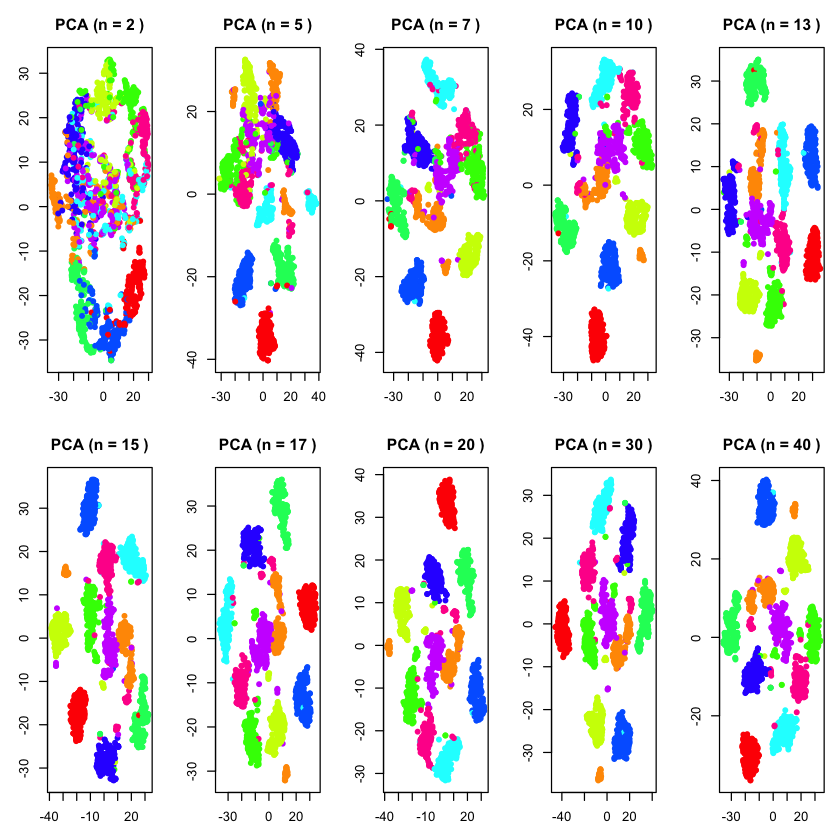

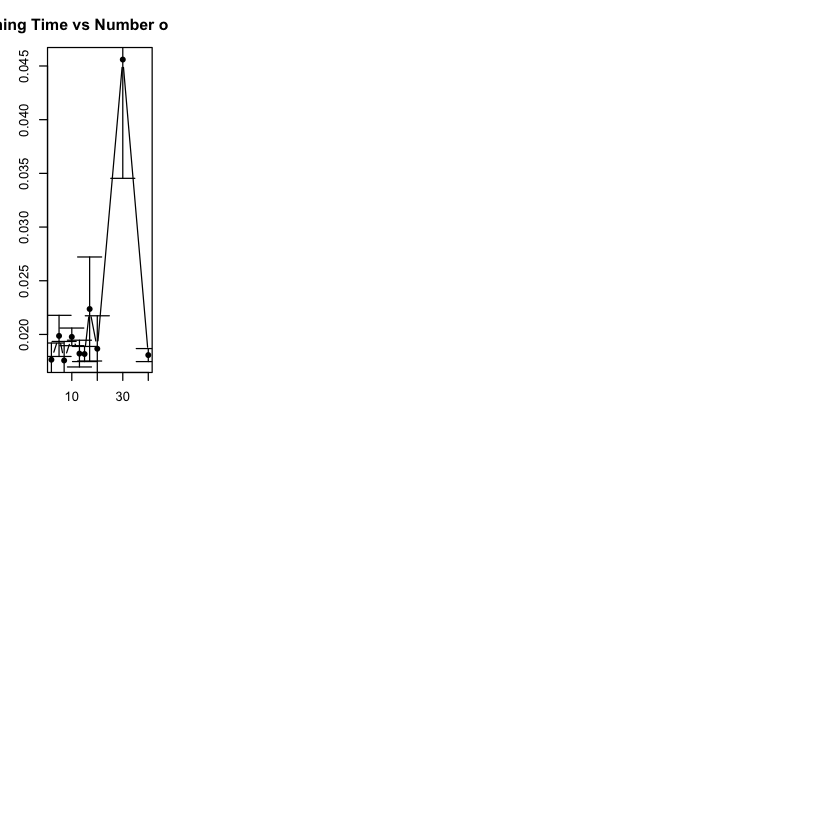

In [24]:
# Load required libraries
library(MASS)       # for SVD decomposition
library(Rtsne)      # for t-SNE
library(ggplot2)    # for plotting

# Function to run PCA once
run_pca_once <- function(X, n_comp) {
  start_time <- Sys.time()
  pca <- prcomp(X, center = TRUE, scale. = FALSE)
  Z <- pca$x[, 1:n_comp]
  end_time <- Sys.time()
  time_taken <- as.numeric(difftime(end_time, start_time, units = "secs"))
  return(list(time_taken = time_taken, pca = pca, Z = Z))
}

# Compare PCA results and visualize projections using t-SNE for different component numbers
compare_svd_pca_components <- function(X, y, components_list = c(2, 5, 10, 20), n_runs = 3) {
  n_plots <- length(components_list)
  n_cols <- 5
  n_rows <- ceiling(n_plots / n_cols)
  
  # Set up plotting grid
  par(mfrow = c(n_rows, n_cols), mar = c(3, 3, 3, 1))
  
  running_times <- numeric(length(components_list))
  running_times_std <- numeric(length(components_list))
  var_explaineds <- numeric(length(components_list))
  
  for (idx in 1:length(components_list)) {
    n_comp <- components_list[idx]
    
    # Run PCA multiple times
    times <- numeric(n_runs)
    for (run in 1:n_runs) {
      result <- run_pca_once(X, n_comp)
      times[run] <- result$time_taken
    }
    
    # Calculate mean and standard deviation of running times
    mean_time <- mean(times)
    std_time <- sd(times)
    running_times[idx] <- mean_time
    running_times_std[idx] <- std_time
    
    # Visualize using t-SNE
    pca_result <- run_pca_once(X, n_comp)
    Z_2d <- Rtsne(pca_result$Z)$Y  # t-SNE transformation
    
    # Plot t-SNE visualization
    plot(Z_2d, col = rainbow(10)[y + 1], pch = 16, main = paste("PCA (n =", n_comp, ")"), xlab = "t-SNE 1", ylab = "t-SNE 2")
    var_explaineds[idx] <- sum(pca_result$pca$sdev[1:n_comp]^2) / sum(pca_result$pca$sdev^2) * 100
  }
  
  # Plot running times with error bars
  plot(components_list, running_times, type = "b", pch = 16, xlab = "Number of Components", ylab = "Time (s)", 
       main = "PCA Running Time vs Number of Components")
  arrows(components_list, running_times - running_times_std, components_list, running_times + running_times_std, angle = 90, code = 3, length = 0.1)
  
  # Display variance explained for each component number
  print(paste("Variance explained by PCA components: ", var_explaineds))
}

# Use previously loaded X and y data
components_to_try <- c(2, 5, 7, 10, 13, 15, 17, 20, 30, 40)
compare_svd_pca_components(X, y, components_list = components_to_try)

### ML PPCA

In the following part, your just need to using your implementation of ML PPCA to extract the latent embedding Z and estimate other parameters in function `run_mlppca_once`

In [25]:
# Function to run ML-PPCA once and record time
run_mlppca_once <- function(X, n_comp) {
  start_time <- Sys.time()
  # Your code here
  # some code here
  # mu <-
  # W_ml <-
  # sigma2_ml <-
  # Z <-

  end_time <- Sys.time()
  time_taken <- as.numeric(difftime(end_time, start_time, units = "secs"))
  
  return(list(
    time_taken = time_taken,
    Z = Z,
    W = W_ml,
    sigma2 = sigma2_ml,
    mu = mu
  ))
}



In [26]:
# Compare ML-PPCA results with different components
compare_mlpca_components <- function(X, y, components_list = c(2, 5, 10, 20), n_runs = 3) {
  n_plots <- length(components_list)
  n_cols <- 5
  n_rows <- ceiling(n_plots / n_cols)
  
  # Set up plotting grid
  par(mfrow = c(n_rows, n_cols), mar = c(3, 3, 3, 1))
  
  running_times <- numeric(length(components_list))
  running_times_std <- numeric(length(components_list))
  
  for (idx in 1:length(components_list)) {
    n_comp <- components_list[idx]
    
    # Run multiple times and record times
    times <- numeric(n_runs)
    for (run in 1:n_runs) {
      result <- run_mlppca_once(X, n_comp)
      times[run] <- result$time_taken
    }
    
    # Calculate mean and std
    mean_time <- mean(times)
    std_time <- sd(times)
    running_times[idx] <- mean_time
    running_times_std[idx] <- std_time
    
    # Visualize with t-SNE
    ml_ppca_result <- run_mlppca_once(X, n_comp)
    Z_2d <- Rtsne(ml_ppca_result$Z)$Y
    
    # Plot
    plot(Z_2d, col = rainbow(10)[y + 1], pch = 16, 
         main = paste("ML-PPCA (n =", n_comp, ")"), 
         xlab = "Component 1", ylab = "Component 2")
  }
  
  # Plot running times with error bars
  plot(components_list, running_times, type = "b", pch = 16,
       xlab = "Number of Components", ylab = "Running Time (s)",
       main = "ML-PPCA Running Time vs Number of Components")
  arrows(components_list, running_times - running_times_std,
         components_list, running_times + running_times_std,
         angle = 90, code = 3, length = 0.1)
  
  # Display results
  print(paste("Running times for ML-PPCA components:", 
              paste(running_times, collapse = ", ")))
}


In [ ]:
components_to_try <- c(2, 5, 7, 10, 13, 15, 17, 20, 30, 40)
# set the number of runs to 1 for debugging and set the number of components to 3 for final submission
compare_mlpca_components(X, y, components_list = components_to_try,n_runs=1,)

### PPCA-EM

In the following code, you just need to use your implement of EM PPCA to extract the latent embedding Z and record the log-likelihood values during iterations in function `run_ppca_em_once`

In [17]:
# Function to run PPCA-EM once and record time/convergence
run_ppca_em_once <- function(X, n_comp, n_iter, seed = NULL) {
  start_time <- Sys.time()
  
  # Your code here
  Q_history <- 
  W <- 
  sigma2 <- 
  # Get final projection
  Z <-   # Transpose to get (N x M)
  
  end_time <- Sys.time()
  time_taken <- as.numeric(difftime(end_time, start_time, units = "secs"))
  
  return(list(
    time_taken = time_taken,
    Z = Z,
    W = W,
    sigma2 = sigma2,
    Q_history = Q_history
  ))
}



In [18]:

# Compare PPCA-EM results with different components
compare_ppca_em_components <- function(X, y, components_list = c(2, 5, 10, 20), 
                                     n_runs = 3, n_iter = 30) {
  n_plots <- length(components_list)
  n_cols <- 5
  n_rows <- ceiling(n_plots / n_cols)
  
  # Set up plotting grid
  par(mfrow = c(n_rows, n_cols), mar = c(3, 3, 3, 1))
  
  running_times <- numeric(length(components_list))
  running_times_std <- numeric(length(components_list))
  convergence_iters <- numeric(length(components_list))
  convergence_iters_std <- numeric(length(components_list))
  
  for (idx in 1:length(components_list)) {
    n_comp <- components_list[idx]
    
    # Run multiple times and record metrics
    times <- numeric(n_runs)
    iters <- numeric(n_runs)
    for (run in 1:n_runs) {
      result <- run_ppca_em_once(X, n_comp, n_iter, seed = 42 + run)
      times[run] <- result$time_taken
      iters[run] <- length(result$Q_history) - 1
    }
    
    # Calculate statistics
    mean_time <- mean(times)
    std_time <- sd(times)
    mean_iters <- mean(iters)
    std_iters <- sd(iters)
    
    running_times[idx] <- mean_time
    running_times_std[idx] <- std_time
    convergence_iters[idx] <- mean_iters
    convergence_iters_std[idx] <- std_iters
    
    # Visualize with t-SNE
    ppca_result <- run_ppca_em_once(X, n_comp, n_iter)
    Z_2d <- Rtsne(ppca_result$Z)$Y
    
    # Plot
    plot(Z_2d, col = rainbow(10)[y + 1], pch = 16,
         main = paste("PPCA EM (n =", n_comp, ")"),
         xlab = "Component 1", ylab = "Component 2")
  }
  
  # Plot running times with error bars
  plot(components_list, running_times, type = "b", pch = 16,
       xlab = "Number of Components", ylab = "Running Time (s)",
       main = "PPCA EM Running Time vs Number of Components")
  arrows(components_list, running_times - running_times_std,
         components_list, running_times + running_times_std,
         angle = 90, code = 3, length = 0.1)
  
  # Display results
  print(paste("Running times for PPCA-EM components:", 
              paste(running_times, collapse = ", ")))
  print(paste("Average iterations for convergence:", 
              paste(convergence_iters, collapse = ", ")))
}

In [ ]:
components_to_try <- c(2, 5, 7, 10, 13, 15, 17, 20, 30, 40)
# set the number of runs to 1 for debugging and set the number of components to 3 for final submission
compare_ppca_em_components(X, y, components_to_try, n_runs =1, n_iter = 50)